## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset


In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice in the DataFrame.
mice_count=len(combined_data['Mouse ID'].value_counts())
mice_count


249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateid_df=combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]
duplicateid_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateid2_df=combined_data[combined_data.duplicated(['Mouse ID'], keep=False)]
duplicateid2_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicateid3_df=combined_data.drop_duplicates(subset=['Mouse ID','Timepoint'], keep = 'first')
duplicateid3_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
mice_count=len(duplicateid3_df['Mouse ID'].value_counts())
mice_count

249

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_df =duplicateid3_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

regimen_tumor_mean=regimen_df.mean()
regimen_tumor_median=regimen_df.median()
regimen_tumor_var=regimen_df.var()
regimen_tumor_std=regimen_df.std()
regimen_tumor_SEM=regimen_df.sem()
regimen_tumor_SEM


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics= pd.DataFrame({"Mean": regimen_tumor_mean, "Median":regimen_tumor_median, 
                                  "Variance":regimen_tumor_median, "Std Dev":regimen_tumor_std, "SEM":regimen_tumor_SEM})

summary_statistics

,Mean,Median,Variance,Std Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,52.288934,7.821003,0.581331
Propriva,52.393463,50.909965,50.909965,6.568014,0.525862
Ramicane,40.216745,40.673236,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,52.431737,7.710419,0.573111


## Bar Plots

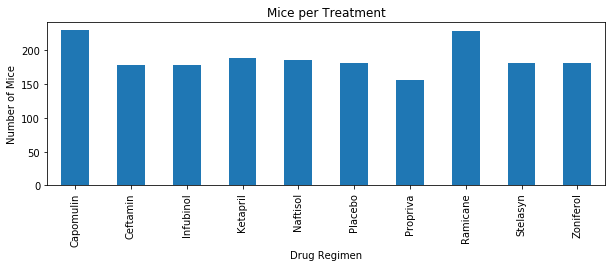

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
mice_treatment_df =duplicateid3_df.groupby(['Drug Regimen'])['Mouse ID'].count()
mice_treatment_df.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Mice per Treatment")
plt.ylabel("Number of Mice")

plt.show()
plt.tight_layout()



In [13]:
mice_treatment_df

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

Text(0, 0.5, 'Number of Mice')

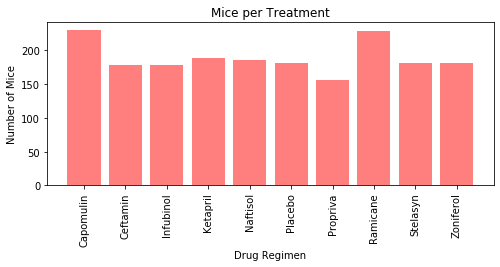

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(mice_treatment_df))

mice=[230, 178, 178, 188, 186, 181, 156, 228, 181, 182]
plt.figure(figsize=(8,3))
plt.bar(x_axis, mice, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol","Placebo", "Propriva","Ramicane", "Stelasyn", "Zoniferol"], rotation="vertical")
plt.title("Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

## Pie Plots

,Count
Sex,
Female,124
Male,125


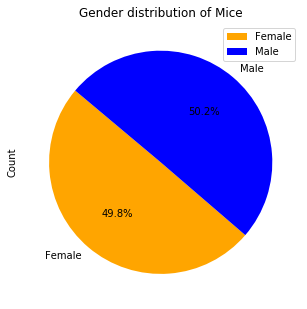

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_gender=duplicateid3_df.groupby([ "Sex", "Mouse ID"])
mice_gender


mice_gender_df=pd.DataFrame(mice_gender.size())
mice_gender_df
#
num_gender =pd.DataFrame(mice_gender_df.groupby(["Sex"]).count())
num_gender.columns =["Count"]

gender_pie = num_gender.plot(kind="pie", y='Count',autopct='%1.1f%%', figsize=(5, 7),colors=['orange', 'blue'],startangle=140, title=("Gender distribution of Mice"))
#plt.axis("equal")
num_gender

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

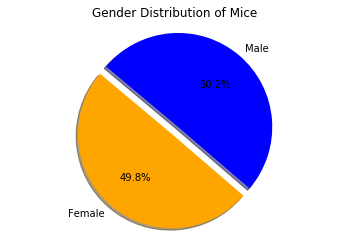

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female", "Male"]
count= [124, 125]
colors = ['orange', 'blue']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(count, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Gender Distribution of Mice")
plt.axis('equal')


## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

Capomulin_df =duplicateid3_df.loc[duplicateid3_df['Drug Regimen'] =="Capomulin",:]
Capomulin_tumor_max =Capomulin_df.groupby(["Mouse ID"])["Timepoint"].max()
Capomulin_new_df =pd.DataFrame(Capomulin_tumor_max)
Capomulin_merge_df =pd.merge(Capomulin_new_df, duplicateid3_df, on=("Mouse ID","Timepoint"), how="left")

total_tumor_volume_Cap=Capomulin_merge_df['Tumor Volume (mm3)']

quartiles = total_tumor_volume_Cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Capomulin_merge_df.head()

The lower quartile of Tumor Volume is: 32.37735684
The upper quartile of Tumor Volume is: 40.1592203
The interquartile range of Tumor Volume is: 7.781863460000004
The the median of Tumor Volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [18]:
Ramicane_df =duplicateid3_df.loc[duplicateid3_df['Drug Regimen'] =="Ramicane",:]
Ramicane_tumor_max =Ramicane_df.groupby(["Mouse ID"])["Timepoint"].max()
Ramicane_new_df =pd.DataFrame(Ramicane_tumor_max)
Ramicane_merge_df =pd.merge(Ramicane_new_df, duplicateid3_df, on=("Mouse ID","Timepoint"), how="left")

total_tumor_volume_Ram=Ramicane_merge_df['Tumor Volume (mm3)']

quartiles = total_tumor_volume_Ram.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Ramicane_merge_df.head()

The lower quartile of Tumor Volume is: 31.56046955
The upper quartile of Tumor Volume is: 40.65900627
The interquartile range of Tumor Volume is: 9.098536719999998
The the median of Tumor Volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [19]:
Ceftamin_df =duplicateid3_df.loc[duplicateid3_df['Drug Regimen'] =="Ceftamin",:]
Ceftamin_tumor_max =Ceftamin_df.groupby(["Mouse ID"])["Timepoint"].max()
Ceftamin_new_df =pd.DataFrame(Ceftamin_tumor_max)
Ceftamin_merge_df =pd.merge(Ceftamin_new_df, duplicateid3_df, on=("Mouse ID","Timepoint"), how="left")

total_tumor_volume_Cef=Ceftamin_merge_df['Tumor Volume (mm3)']

quartiles = total_tumor_volume_Cef.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Ceftamin_merge_df.head()

The lower quartile of Tumor Volume is: 48.72207785
The upper quartile of Tumor Volume is: 64.29983003
The interquartile range of Tumor Volume is: 15.577752179999997
The the median of Tumor Volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [20]:
Infubinol_df =duplicateid3_df.loc[duplicateid3_df['Drug Regimen'] =="Infubinol",:]
Infubinol_tumor_max =Infubinol_df.groupby(["Mouse ID"])["Timepoint"].max()
Infubinol_new_df =pd.DataFrame(Infubinol_tumor_max)
Infubinol_merge_df =pd.merge(Infubinol_new_df, duplicateid3_df, on=("Mouse ID","Timepoint"), how="left")
total_tumor_volume_Inf=Infubinol_merge_df['Tumor Volume (mm3)']

quartiles = total_tumor_volume_Inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume is: {lowerq}")
print(f"The upper quartile of Tumor Volume is: {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The the median of Tumor Volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
Infubinol_merge_df.head()

The lower quartile of Tumor Volume is: 54.04860769
The upper quartile of Tumor Volume is: 65.52574285
The interquartile range of Tumor Volume is: 11.477135160000003
The the median of Tumor Volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


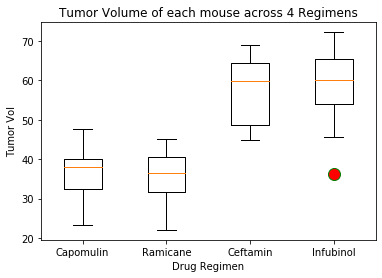

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumor_total=[total_tumor_volume_Cap, total_tumor_volume_Ram, total_tumor_volume_Cef,total_tumor_volume_Inf]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of each mouse across 4 Regimens')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Vol')
flierprops = dict(marker='o', markerfacecolor='r', markersize=12, linestyle='none', markeredgecolor='g')
ax1.boxplot(tumor_total, flierprops= flierprops, labels=["Capomulin","Ramicane","Ceftamin","Infubinol"])
plt.show()

## Line and Scatter Plots

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2
376,l509,Capomulin,Male,17,21,25,44.006257,2
377,l509,Capomulin,Male,17,21,30,44.708055,2
378,l509,Capomulin,Male,17,21,35,40.207289,2
379,l509,Capomulin,Male,17,21,40,40.770813,2
380,l509,Capomulin,Male,17,21,45,41.483008,3


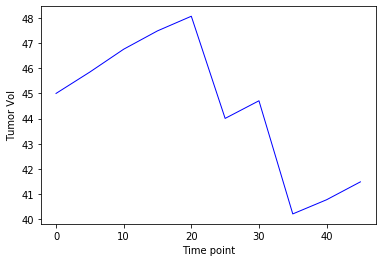

In [474]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin_df.head()
Capomulin_l509 =Capomulin_df.loc[Capomulin_df['Mouse ID'] =="l509",:]
Capomulin_l509
Timepoint_l509=Capomulin_l509['Timepoint']
Timepoint_l509
Tumor_vol_l509 =Capomulin_l509['Tumor Volume (mm3)']
Tumor_vol_l509
plt.xlabel("Time point")
plt.ylabel("Tumor Vol")
plt.plot( Timepoint_l509, Tumor_vol_l509, color="blue", linewidth=1, MARKERSIZE=12, label="Time point vs Tumor Vol for mouse ID s185")

Capomulin_s185


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


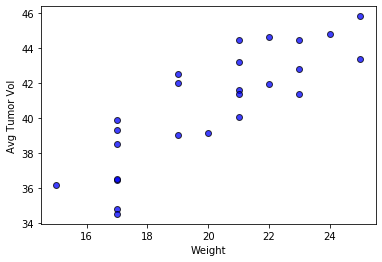

In [493]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_df.head()

Capomulin_tumor_avg =Capomulin_df.groupby(['Mouse ID']).mean()
Capomulin_tumor_avg
Capomulin_new_tumor_avg_df =pd.DataFrame(Capomulin_tumor_avg)
weight= Capomulin_new_tumor_avg_df['Weight (g)']
avg_tumor= Capomulin_new_tumor_avg_df['Tumor Volume (mm3)'] 
plt.xlabel("Weight")
plt.ylabel("Avg Tumor Vol")
plt.scatter(weight, avg_tumor , marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
Capomulin_new_tumor_avg_df.head()


## Correlation and Regression

In [476]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight,avg_tumor)
print(f"The correlation between mouse weight and average tumor volume  is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume  is 0.84


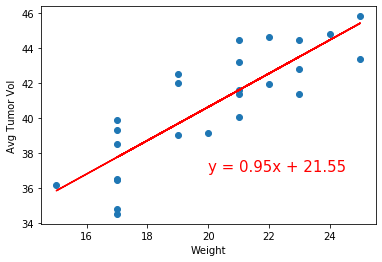

In [488]:
x_values = Capomulin_new_tumor_avg_df['Weight (g)']
y_values = Capomulin_new_tumor_avg_df['Tumor Volume (mm3)'] 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,37),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Avg Tumor Vol')
plt.show()
